# PCAP

Ref: https://medium.com/hackervalleystudio/learning-packet-analysis-with-data-science-5356a3340d4e

https://scapy.readthedocs.io/en/latest/usage.html#reading-pcap-files

### Download files

In [1]:
!wget https://drive.google.com/uc?id=1uOszN_l-hFd2eCAc4I_RWQSJTor8Zsps -O suspicious.pcap

--2020-04-20 06:16:26--  https://drive.google.com/uc?id=1uOszN_l-hFd2eCAc4I_RWQSJTor8Zsps
Resolving drive.google.com (drive.google.com)... 74.125.31.102, 74.125.31.138, 74.125.31.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.31.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/thvfm5i4t275rtboisocjgv4g04kbp26/1587363375000/17174434063503717705/*/1uOszN_l-hFd2eCAc4I_RWQSJTor8Zsps [following]
--2020-04-20 06:16:26--  https://doc-04-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/thvfm5i4t275rtboisocjgv4g04kbp26/1587363375000/17174434063503717705/*/1uOszN_l-hFd2eCAc4I_RWQSJTor8Zsps
Resolving doc-04-38-docs.googleusercontent.com (doc-04-38-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to doc-04-38-docs.googleusercontent.com (doc-04-38-docs.googleusercontent.com)|172.217.2

In [2]:
!ls -al

total 52
drwxr-xr-x 1 root root  4096 Apr 20 06:16 .
drwxr-xr-x 1 root root  4096 Apr 20 06:15 ..
drwxr-xr-x 1 root root  4096 Apr 15 16:10 .config
drwxr-xr-x 1 root root  4096 Apr  3 16:24 sample_data
-rw-r--r-- 1 root root 33463 Apr 20 06:16 suspicious.pcap


In [3]:
# trick that let us know this vm ip
!curl ipecho.net/plain

34.73.221.206

### Install packages

In [4]:
pip install scapy

     |████████████████████████████████| 911kB 2.8MB/s 
  Created wheel for scapy: filename=scapy-2.4.3-py2.py3-none-any.whl size=1043873 sha256=6c3345df7fcef3c8de29ed54f7ccda16483fb504a04f77e069bf1d0cd7ed947d
  Stored in directory: /root/.cache/pip/wheels/95/bf/51/905b3e84ec4ca910ce4ae92173c7334623105a265bdd1d9438
Successfully built scapy


In [5]:
# version problem not scapy import *
from scapy.all import * # Packet manipulation

import pandas as pd
import numpy as np
import binascii # Binary to Ascii 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### sniff 10 packets


In [0]:
# sniff 100 packets
num_of_packets_to_sniff = 100
pcap = sniff(count=num_of_packets_to_sniff)

In [7]:
print(type(pcap))
print(len(pcap))
print(pcap)

<class 'scapy.plist.PacketList'>
100
<Sniffed: TCP:100 UDP:0 ICMP:0 Other:0>


In [8]:
pcap[0]

<Ether  dst=02:42:ac:1c:00:02 src=02:42:7f:6e:e0:af type=IPv4 |<IP  version=4 ihl=5 tos=0x0 len=499 id=26406 flags=DF frag=0 ttl=64 proto=6 chksum=0x79a3 src=172.28.0.1 dst=172.28.0.2 |<TCP  sport=50744 dport=8080 seq=3317973514 ack=3668032986 dataofs=8 reserved=0 flags=PA window=501 chksum=0x5a21 urgptr=0 options=[('NOP', None), ('NOP', None), ('Timestamp', (3944074999, 2804895136))] |<Raw  load='GET /api/colab/resources HTTP/1.1\r\nHost: colab.research.google.com\r\nUser-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36,gzip(gfe)\r\nAccept: */*\r\nAccept-Encoding: gzip, deflate, br,gzip(gfe)\r\nAccept-Language: zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7\r\nReferer: https://colab.research.google.com/\r\nSec-Fetch-Dest: empty\r\nSec-Fetch-Mode: cors\r\nSec-Fetch-Site: same-origin\r\n\r\n' |>>>>

### sniff example


In [0]:
# prn = print, everytime you catch a packet then throw it to print
# .show() is better to look
# raw if string is ascill then program will print
sniff(prn=lambda x: x.show(), count=2)

###[ Ethernet ]### 
  dst       = 02:42:ac:1c:00:02
  src       = 02:42:2d:d3:84:fa
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 499
     id        = 65520
     flags     = DF
     frag      = 0
     ttl       = 64
     proto     = 6
     chksum    = 0xe0d8
     src       = 172.28.0.1
     dst       = 172.28.0.2
     \options   \
###[ TCP ]### 
        sport     = 52360
        dport     = 8080
        seq       = 2572756198
        ack       = 1957027961
        dataofs   = 8
        reserved  = 0
        flags     = PA
        window    = 501
        chksum    = 0x5a21
        urgptr    = 0
        options   = [('NOP', None), ('NOP', None), ('Timestamp', (2923360871, 78033339))]
###[ Raw ]### 
           load      = 'GET /api/colab/resources HTTP/1.1\r\nHost: colab.research.google.com\r\nUser-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36,g

<Sniffed: TCP:2 UDP:0 ICMP:0 Other:0>

In [9]:
# summary more easy
sniff(prn=lambda x: x.summary(), count = 2)

Ether / IP / TCP 172.28.0.2:9000 > 172.28.0.3:37338 PA / Raw
Ether / IP / TCP 172.28.0.3:37338 > 172.28.0.2:9000 A


<Sniffed: TCP:2 UDP:0 ICMP:0 Other:0>

In [0]:
pkts = sniff(prn=lambda x:x.sprintf("{IP:%IP.src% -> %IP.dst%\n}{Raw:%Raw.load%\n}"), count=4)

172.28.0.3 -> 172.28.0.2
'\x81~\x02\xcb{"parent_header": {"username": "username", "version": "5.0", "msg_type": "execute_request", "msg_id": "69a2fdb5edb94a08a30e250ae48b2593", "session": "9529f4094be0476588df6b7cffaf4f26", "date": "2020-04-20T04:52:08.586317Z"}, "msg_type": "execute_input", "msg_id": "b511afed-35df64eb5a6efe7680fbe629", "content": {"execution_count": 122, "code": "pkts = sniff(prn=lambda x:x.sprintf(\\"{IP:%IP.src% -> %IP.dst%\\\\n}{Raw:%Raw.load%\\\\n}\\"), count=4)"}, "header": {"username": "username", "version": "5.3", "msg_type": "execute_input", "msg_id": "b511afed-35df64eb5a6efe7680fbe629", "session": "e3527f76-3274b09595f42ca03689d2c3", "date": "2020-04-20T04:52:08.587981Z"}, "channel": "iopub", "buffers": [], "metadata": {}}'

172.28.0.2 -> 172.28.0.3

172.28.0.2 -> 172.28.0.3
'\x81~\x05\xcc{"parent_header": {"username": "username", "version": "5.0", "msg_type": "execute_request", "msg_id": "69a2fdb5edb94a08a30e250ae48b2593", "session": "9529f4094be0476588df6b

In [0]:
load_module("p0f")
conf.p0f_base

In [0]:
# may not work
# 抓一個封包，做prnp0f
p = sniff(prn=prnp0f, count=1)

# may not work
# 看windows還是linux機器
p0f(p[0])

### Append suspicious pcap to current stream


In [0]:
# rd = read
pcap = pcap + rdpcap("/content/suspicious.pcap")

In [13]:
print(len(pcap))
pcap

162


<Sniffed+suspicious.pcap: TCP:100 UDP:62 ICMP:0 Other:0>

### TCP Segment
Frames/Packets/Segments each encapsulated layer consists of fields

In [0]:
"""
0                   1                   2                   3
0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|          Source Port          |       Destination Port        |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                        Sequence Number                        |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                    Acknowledgment Number                      |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|  Data |           |U|A|P|R|S|F|                               |
| Offset| Reserved  |R|C|S|S|Y|I|            Window             |
|       |           |G|K|H|T|N|N|                               |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|           Checksum            |         Urgent Pointer        |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                    Options                    |    Padding    |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                             data                              |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
02 04 05 a0 01 03 03 05 01 01 08 0a 1d 74 65 c5 00 00 00 00 04 02 00 00
"""

# Frames/Packets/Segments all consists of fields
# TODO: Identify how to handle arrays in dataframe

print()

### Exploring an item in packet list

In [17]:
# ETHERNET -> Internet Protocol -> Layer 4 Segments
# We're only interested in Layers 3 (IP) and 4 (TCP AND UDP) 
## We'll parse those two layers and the layer 4 payload
## When capturing we capture layer 2 frames and beyond

# Retrieving a single item from packet list
ethernet_frame = pcap[101] #選了一個封包就是packet frame
ip_packet = ethernet_frame.payload 
segment = ip_packet.payload
data = segment.payload # Retrieve payload that comes after layer 4

# Observe that we just popped off previous layer header
print(ethernet_frame.summary()) # Ether / IP / UDP / DNS Ans "2607:f8b0:4005:807::200e" 
print(ip_packet.summary()) # IP / UDP / DNS Ans "2607:f8b0:4005:807::200e" 
print(segment.summary()) # UDP / DNS Ans "2607:f8b0:4005:807::200e" 
print(data.summary()) # If blank, empty object

# Complete depiction of paket
## Achieving understanding that these are the fields will enable the ability 
## to ask the data more meaningful questions ie) type of layer 4 segment is defined in layer 3 packet
ethernet_frame.show()
# 4個A IPv6

Ether / IP / UDP / DNS Ans "2607:f8b0:4005:807::200e" 
IP / UDP / DNS Ans "2607:f8b0:4005:807::200e" 
UDP / DNS Ans "2607:f8b0:4005:807::200e" 
DNS Ans "2607:f8b0:4005:807::200e" 
###[ Ethernet ]### 
  dst       = 88:e9:fe:6a:92:52
  src       = 80:37:73:96:9b:db
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x20
     len       = 84
     id        = 58919
     flags     = 
     frag      = 0
     ttl       = 122
     proto     = 17
     chksum    = 0x360c
     src       = 84.54.22.33
     dst       = 10.1.10.53
     \options   \
###[ UDP ]### 
        sport     = 53
        dport     = 53
        len       = 64
        chksum    = 0xfe25
###[ DNS ]### 
           id        = 12
           qr        = 1
           opcode    = QUERY
           aa        = 0
           tc        = 0
           rd        = 1
           ra        = 1
           z         = 0
           ad        = 0
           cd        = 0
           rcode     = ok
           qdcou

In [15]:
hexdump(pcap[101])

0000  88 E9 FE 6A 92 52 80 37 73 96 9B DB 08 00 45 20  ...j.R.7s.....E 
0010  00 54 E6 27 00 00 7A 11 36 0C 54 36 16 21 0A 01  .T.'..z.6.T6.!..
0020  0A 35 00 35 00 35 00 40 FE 25 00 0C 81 80 00 01  .5.5.5.@.%......
0030  00 01 00 00 00 00 06 67 6F 6F 67 6C 65 03 63 6F  .......google.co
0040  6D 00 00 1C 00 01 C0 0C 00 1C 00 01 00 00 01 2B  m..............+
0050  00 10 26 07 F8 B0 40 05 08 07 00 00 00 00 00 00  ..&...@.........
0060  20 0E                                             .


In [14]:
ls(pcap[101])

dst        : DestMACField                        = '88:e9:fe:6a:92:52' (None)
src        : SourceMACField                      = '80:37:73:96:9b:db' (None)
type       : XShortEnumField                     = 2048            (36864)
--
version    : BitField (4 bits)                   = 4               (4)
ihl        : BitField (4 bits)                   = 5               (None)
tos        : XByteField                          = 32              (0)
len        : ShortField                          = 84              (None)
id         : ShortField                          = 58919           (1)
flags      : FlagsField (3 bits)                 = <Flag 0 ()>     (<Flag 0 ()>)
frag       : BitField (13 bits)                  = 0               (0)
ttl        : ByteField                           = 122             (64)
proto      : ByteEnumField                       = 17              (0)
chksum     : XShortField                         = 13836           (None)
src        : SourceIPField          

In [0]:
pcap[101].summary()

'Ether / IP / UDP / DNS Ans "2607:f8b0:4005:807::200e" '

In [0]:
pcap[101].show()

###[ Ethernet ]### 
  dst       = 88:e9:fe:6a:92:52
  src       = 80:37:73:96:9b:db
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x20
     len       = 84
     id        = 58919
     flags     = 
     frag      = 0
     ttl       = 122
     proto     = 17
     chksum    = 0x360c
     src       = 84.54.22.33
     dst       = 10.1.10.53
     \options   \
###[ UDP ]### 
        sport     = 53
        dport     = 53
        len       = 64
        chksum    = 0xfe25
###[ DNS ]### 
           id        = 12
           qr        = 1
           opcode    = QUERY
           aa        = 0
           tc        = 0
           rd        = 1
           ra        = 1
           z         = 0
           ad        = 0
           cd        = 0
           rcode     = ok
           qdcount   = 1
           ancount   = 1
           nscount   = 0
           arcount   = 0
           \qd        \
            |###[ DNS Question Record ]### 
            |  qname     = '

See this to show visualized graph of a packet.

https://scapy.readthedocs.io/en/latest/usage.html#graphical-dumps-pdf-ps

Required PyX

### Understanding object types in scapy and Importing layers

In [18]:
# Understanding the object types in scapy
print(type(ethernet_frame))
print(type(ip_packet))
print(type(segment))

# Packets can be filtered on layers ie) ethernet_frame[scapy.layers.l2.Ether]
ethernet_type = type(ethernet_frame)
ip_type = type(ip_packet)
tcp_type = type(segment)
print("Ethernet", pcap[ethernet_type])
print("IP", pcap[ip_type])
print("TCP", pcap[tcp_type])

# Scapy provides this via import statements
from scapy.layers.l2 import Ether
from scapy.layers.inet import IP
from scapy.layers.inet import TCP, UDP

print("UDP", pcap[UDP])

<class 'scapy.layers.l2.Ether'>
<class 'scapy.layers.inet.IP'>
<class 'scapy.layers.inet.UDP'>
Ethernet <Ether from Sniffed+suspicious.pcap: TCP:100 UDP:62 ICMP:0 Other:0>
IP <IP from Sniffed+suspicious.pcap: TCP:100 UDP:62 ICMP:0 Other:0>
TCP <UDP from Sniffed+suspicious.pcap: TCP:0 UDP:62 ICMP:0 Other:0>
UDP <UDP from Sniffed+suspicious.pcap: TCP:0 UDP:62 ICMP:0 Other:0>


### Convert PCAP to DataFrame

In [0]:
# Collect field names from IP/TCP/UDP (These will be columns in DF)
ip_fields = [field.name for field in IP().fields_desc]
tcp_fields = [field.name for field in TCP().fields_desc]
udp_fields = [field.name for field in UDP().fields_desc]

dataframe_fields = ip_fields + ['time'] + tcp_fields + ['payload','payload_raw','payload_hex']

# Create blank DataFrame
df = pd.DataFrame(columns=dataframe_fields)
for packet in pcap[IP]:
    # Field array for each row of DataFrame
    field_values = []
    # Add all IP fields to dataframe
    for field in ip_fields:
        if field == 'options':
            # Retrieving number of options defined in IP Header
            field_values.append(len(packet[IP].fields[field]))
        else:
            field_values.append(packet[IP].fields[field])
    # 錄的時候的時間
    field_values.append(packet.time)
    
    layer_type = type(packet[IP].payload)
    for field in tcp_fields:
        try:
            if field == 'options':
                field_values.append(len(packet[layer_type].fields[field]))
            else:
                field_values.append(packet[layer_type].fields[field])
        except:
            field_values.append(None)
    
    # Append payload
    field_values.append(len(packet[layer_type].payload))
    field_values.append(packet[layer_type].payload.original) #byte
    field_values.append(binascii.hexlify(packet[layer_type].payload.original)) #byte->hex
    # Add row to DF
    df_append = pd.DataFrame([field_values], columns=dataframe_fields)
    df = pd.concat([df, df_append], axis=0)

# Reset Index
df = df.reset_index()
# Drop old index column
df = df.drop(columns="index")

### DataFrame


In [20]:
# Return first 5 rows
df.head()

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,src,dst,options,time,sport,dport,seq,ack,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,499,26406,DF,0,64,6,31139,172.28.0.1,172.28.0.2,0,1.58736e+09,50744,8080,3317973514,3668032986,8,0,PA,501,23073,0,3,447,b'GET /api/colab/resources HTTP/1.1\r\nHost: c...,b'474554202f6170692f636f6c61622f7265736f757263...
1,4,5,0,52,48182,DF,0,64,6,9810,172.28.0.2,172.28.0.1,0,1.58736e+09,8080,50744,3668032986,3317973961,8,0,A,501,22626,0,3,0,b'',b''
2,4,5,0,60,14043,DF,0,64,6,43939,172.28.0.2,172.28.0.3,0,1.58736e+09,57614,6000,2460180108,0,10,0,S,64240,22636,0,5,0,b'',b''
3,4,5,0,60,0,DF,0,64,6,57982,172.28.0.3,172.28.0.2,0,1.58736e+09,6000,57614,1564290379,2460180109,10,0,SA,65160,22636,0,5,0,b'',b''
4,4,5,0,52,14044,DF,0,64,6,43946,172.28.0.2,172.28.0.3,0,1.58736e+09,57614,6000,2460180109,1564290380,8,0,A,502,22628,0,3,0,b'',b''


In [0]:
# Return last 5 rows
df.tail()

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,src,dst,options,time,sport,dport,seq,ack,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
157,4,5,32,84,8744,,0,122,17,64011,84.54.22.33,10.1.10.53,0,1532199357.446249,53,53,None,None,None,None,None,None,65088,None,None,56,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,b'000c8180000100010000000006676f6f676c6503636f...
158,4,5,0,969,1,,0,64,17,21214,10.1.10.53,84.54.22.33,0,1532199358.456765,53,53,None,None,None,None,None,None,671,None,None,941,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
159,4,5,32,84,9344,,0,122,17,63411,84.54.22.33,10.1.10.53,0,1532199358.471973,53,53,None,None,None,None,None,None,65089,None,None,56,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,b'000c8180000100010000000006676f6f676c6503636f...
160,4,5,0,588,1,,0,64,17,21595,10.1.10.53,84.54.22.33,0,1532199359.479115,53,53,None,None,None,None,None,None,54406,None,None,560,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
161,4,5,32,84,10094,,0,122,17,62661,84.54.22.33,10.1.10.53,0,1532199359.500812,53,53,None,None,None,None,None,None,65090,None,None,56,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,b'000c8180000100010000000006676f6f676c6503636f...


In [0]:
print(df.shape)

(162, 28)


### Statistics

In [21]:
# Top Source Adddress
print("# Top Source Address")
print(df['src'].describe(),'\n\n')

# Top Destination Address
print("# Top Destination Address")
print(df['dst'].describe(),"\n\n")

frequent_address = df['src'].describe()['top']

# Who is the top address speaking to
print("# Who is Top Address Speaking to?")
print(df[df['src'] == frequent_address]['dst'].unique(),"\n\n")

# Who is the top address speaking to (dst ports)
print("# Who is the top address speaking to (Destination Ports)")
print(df[df['src'] == frequent_address]['dport'].unique(),"\n\n")

# Who is the top address speaking to (src ports)
print("# Who is the top address speaking to (Source Ports)")
print(df[df['src'] == frequent_address]['sport'].unique(),"\n\n")

# Top Source Address
count            162
unique             6
top       172.28.0.2
freq              45
Name: src, dtype: object 


# Top Destination Address
count            162
unique             6
top       172.28.0.2
freq              55
Name: dst, dtype: object 


# Who is Top Address Speaking to?
['172.28.0.1' '172.28.0.3'] 


# Who is the top address speaking to (Destination Ports)
[50744 6000 37276 50782 50814 37338 50822 50832] 


# Who is the top address speaking to (Source Ports)
[8080 57614 9000 57624 56840 57638] 




In [22]:
# Unique Source Addresses
print("Unique Source Addresses")
print(df['src'].unique())

print()

# Unique Destination Addresses
print("Unique Destination Addresses")
print(df['dst'].unique())

Unique Source Addresses
['172.28.0.1' '172.28.0.2' '172.28.0.3' '10.1.10.53' '84.54.22.33'
 '75.75.75.75']

Unique Destination Addresses
['172.28.0.2' '172.28.0.1' '172.28.0.3' '84.54.22.33' '10.1.10.53'
 '75.75.75.75']


### Graphing

在2000年後認為惡意攻擊，通常伴隨著量很大 -> 量大就是異常

近5年因APT，而不再是因為大量才是攻擊，小量也可能是攻擊者 -> 更難找

在Honeypot裡面反而不用管APT，每個進來的都很重要

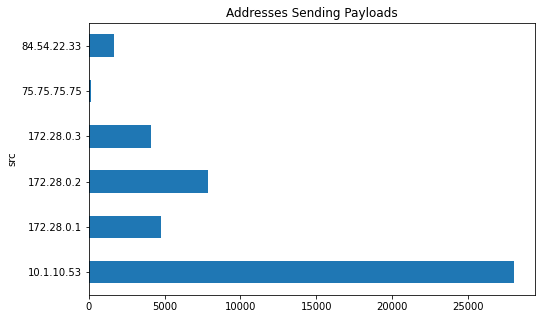

In [23]:
# Group by Source Address and Payload Sum
source_addresses = df.groupby("src")['payload'].sum() # payload length
source_addresses.plot(kind='barh',title="Addresses Sending Payloads",figsize=(8,5))

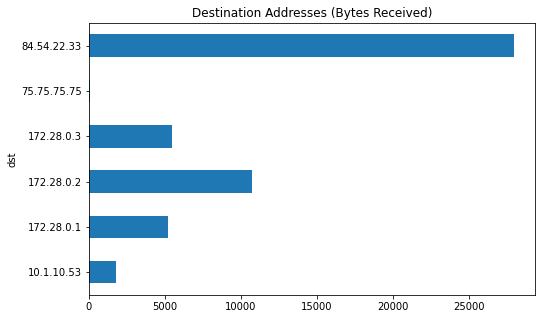

In [0]:
# Group by Destination Address and Payload Sum
destination_addresses = df.groupby("dst")['payload'].sum()
destination_addresses.plot(kind='barh', title="Destination Addresses (Bytes Received)",figsize=(8,5))

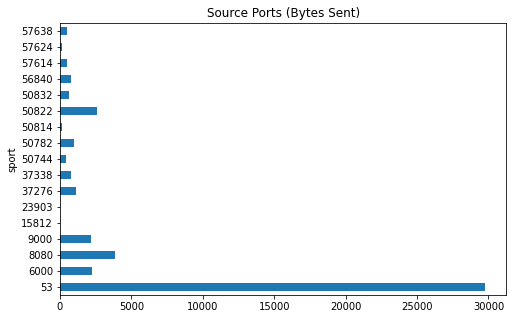

In [24]:
# Group by Source Port and Payload Sum
source_payloads = df.groupby("sport")['payload'].sum()
source_payloads.plot(kind='barh',title="Source Ports (Bytes Sent)",figsize=(8,5))

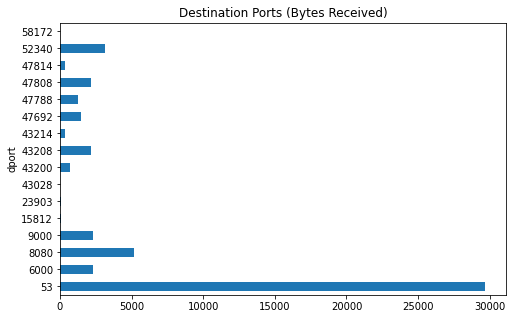

In [0]:
# Group by Destination Port and Payload Sum
destination_payloads = df.groupby("dport")['payload'].sum()
destination_payloads.plot(kind='barh',title="Destination Ports (Bytes Received)",figsize=(8,5))

Text(0.5, 1.0, 'History of bytes sent by most frequent address')

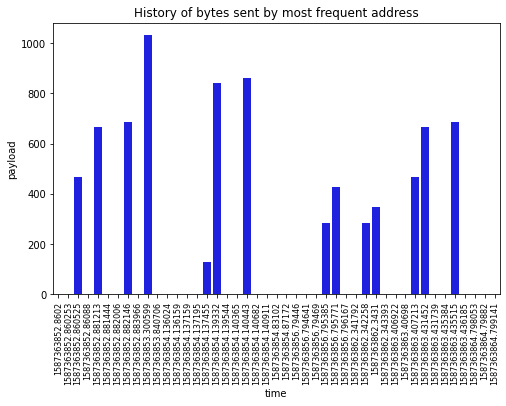

In [25]:
plt.figure(figsize=(8,5))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90, fontsize=8)

#groupby("time")['payload'].sum().plot(kind='barh',title="Destination Ports (Bytes Received)",figsize=(8,5))

# 挑出常見的address，做time & payload的分析 -> 較傳統思維
frequent_address_df = df[df['src'] == frequent_address]
x = frequent_address_df['payload'].tolist()
sns.barplot(x="time", y="payload", data=frequent_address_df[['payload','time']],
            label="Total", color="b").set_title("History of bytes sent by most frequent address")


### Payload Investigation

就是把frequent address，groupby destination 觀察封包的量


172.28.0.3 May be a suspicious address


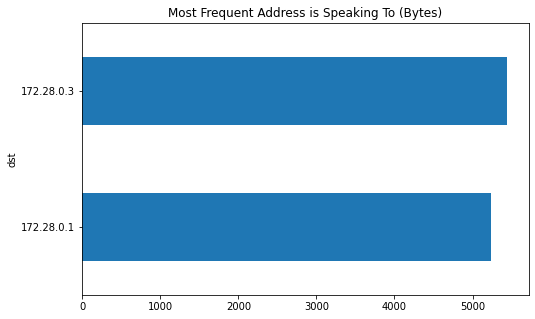

In [0]:
# Create dataframe with only converation from most frequent address
frequent_address_df = df[df['src']==frequent_address]

# Only display Src Address, Dst Address, and group by Payload 
frequent_address_groupby = frequent_address_df[['src','dst','payload']].groupby("dst")['payload'].sum()

# Plot the Frequent address is speaking to (By Payload)
frequent_address_groupby.plot(kind='barh',title="Most Frequent Address is Speaking To (Bytes)",figsize=(8,5))

# Which address has excahnged the most amount of bytes with most frequent address
suspicious_ip = frequent_address_groupby.sort_values(ascending=False).index[0]
print(suspicious_ip, "May be a suspicious address")

# Create dataframe with only conversation from most frequent address and suspicious address
suspicious_df = frequent_address_df[frequent_address_df['dst']==suspicious_ip]

In [0]:
# Store each payload in an array
raw_stream = []
for p in suspicious_df['payload_raw']:
    raw_stream.append(p)
    
print(raw_stream)

[b'\x81\xfe\x01\x8cJ\xf5)\x111\xd7At+\x91Lch\xcfR3\'\x86NN#\x91\x0b+h\xc0\x1bur\x97\x19 (\x97K\',\xc1\x1a)(\x96\x11%~\x93Hw~\xcc\x11%,\xc7\x18"s\xd7\x053?\x86Lc$\x94Dth\xcf\x0bd9\x90[\x7f+\x98L3f\xd7Zt9\x86@~$\xd7\x133+\x90\x1e z\xc1\x19rs\xcdHr~\xc1\x1d&(\xcc\x1b .\xc3Lsr\xc3\x11&{\xc5H!h\xd9\x0b|9\x92ve3\x85L3p\xd7Li/\x96\\e/\xaa[t;\x80Lb>\xd7\x053<\x90[b#\x9aG3p\xd7\x1c?z\xd7T=h\x98Le+\x91He+\xd7\x13jh\x96F}+\x97\x0b+1\xd7Fd>\x85\\e\x15\x94Jzh\xcf\x0b(r\xc2Jr{\xc2\x1f\'r\x93\x1d%{\xc5\x1cu~\xc2\x1dr\x7f\xc5Jt)\xc7\x10!x\xc1\x1a37\x88\x053)\x9aGe/\x9b]3p\x8e\x0bp&\x99Ff\x15\x86]u#\x9b\x0b+,\x94Eb/\xd9\x0br%\x91L3p\xd7\x0b=h\x86@}/\x9b]3p\x81[d/\xd9\x0bb>\x9a[t\x15\x9d@b>\x9a[hh\xcfOp&\x86L=h\x80Zt8\xaaLi:\x87Lb9\x9cF\x7f9\xd7\x13j7\xd9\x0bd9\x90[N<\x94[x+\x97Et9\xd7\x13J\x17\x88\x053:\x94[t$\x81vy/\x94Mt8\xd7\x13j7\xd9\x0br"\x94G\x7f/\x99\x0b+h\x86At&\x99\x0bl', b'', b'\x81\xfe\x01\x8c\x9c\x87\xdf\x9f\xe7\xa5\xb7\xfa\xfd\xe3\xba\xed\xbe\xbd\xa4\xbd\xf1\xf4\xb8\xc0\xf5\xe3\xfd\xa5\xbe

### HTTP

In [27]:
http_df = df[df['dport'] == 8080]
http_df

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,src,dst,options,time,sport,dport,seq,ack,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,499,26406,DF,0,64,6,31139,172.28.0.1,172.28.0.2,0,1.58736e+09,50744,8080,3317973514,3668032986,8,0,PA,501,23073,0,3,447,b'GET /api/colab/resources HTTP/1.1\r\nHost: c...,b'474554202f6170692f636f6c61622f7265736f757263...
16,4,5,0,52,26407,DF,0,64,6,31585,172.28.0.1,172.28.0.2,0,1.58736e+09,50744,8080,3317973961,3668033670,8,0,A,501,22626,0,3,0,b'',b''
17,4,5,0,52,26408,DF,0,64,6,31584,172.28.0.1,172.28.0.2,0,1.58736e+09,50744,8080,3317973961,3668033670,8,0,FA,501,22626,0,3,0,b'',b''
19,4,5,0,52,26409,DF,0,64,6,31583,172.28.0.1,172.28.0.2,0,1.58736e+09,50744,8080,3317973962,3668033671,8,0,A,501,22626,0,3,0,b'',b''
20,4,5,0,549,32437,DF,0,64,6,25058,172.28.0.1,172.28.0.2,0,1.58736e+09,50782,8080,3124590721,1286880669,8,0,PA,501,23123,0,3,497,b'GET /socket.io/?EIO=3&sid=E04nqmVjhbyWp2QvAA...,b'474554202f736f636b65742e696f2f3f45494f3d3326...
22,4,5,0,52,32438,DF,0,64,6,25554,172.28.0.1,172.28.0.2,0,1.58736e+09,50782,8080,3124591218,1286881699,8,0,A,501,22626,0,3,0,b'',b''
23,4,5,0,549,32439,DF,0,64,6,25056,172.28.0.1,172.28.0.2,0,1.58736e+09,50782,8080,3124591218,1286881699,8,0,PA,501,23123,0,3,497,b'GET /socket.io/?EIO=3&sid=E04nqmVjhbyWp2QvAA...,b'474554202f736f636b65742e696f2f3f45494f3d3326...
25,4,5,0,60,45645,DF,0,64,6,12339,172.28.0.1,172.28.0.2,0,1.58736e+09,50814,8080,965004302,0,10,0,S,64240,22634,0,5,0,b'',b''
27,4,5,0,52,45646,DF,0,64,6,12346,172.28.0.1,172.28.0.2,0,1.58736e+09,50814,8080,965004303,3988370399,8,0,A,502,22626,0,3,0,b'',b''
28,4,5,0,163,45647,DF,0,64,6,12234,172.28.0.1,172.28.0.2,0,1.58736e+09,50814,8080,965004303,3988370399,8,0,PA,502,22737,0,3,111,b'GET /api/sessions?health HTTP/1.1\r\nHost: e...,b'474554202f6170692f73657373696f6e733f6865616c...


In [0]:
http_req_df = http_df[http_df['payload_raw'].apply(lambda b: b is not b"")]
http_req_df

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,src,dst,options,time,sport,dport,seq,ack,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,652,46825,DF,0,64,6,10567,172.28.0.1,172.28.0.2,0,1.58736e+09,47692,8080,3454751320,263156675,8,0,PA,501,23226,0,3,600,b'POST /socket.io/?EIO=3&sid=hVZk7YZX5kegYhMxA...,b'504f5354202f736f636b65742e696f2f3f45494f3d33...
2,4,5,0,55,46826,DF,0,64,6,11163,172.28.0.1,172.28.0.2,0,1.58736e+09,47692,8080,3454751920,263156675,8,0,PA,501,22629,0,3,3,b'1:2',b'313a32'
6,4,5,0,549,46828,DF,0,64,6,10667,172.28.0.1,172.28.0.2,0,1.58736e+09,47692,8080,3454751923,263156960,8,0,PA,501,23123,0,3,497,b'GET /socket.io/?EIO=3&sid=hVZk7YZX5kegYhMxAA...,b'474554202f736f636b65742e696f2f3f45494f3d3326...
9,4,5,0,549,46830,DF,0,64,6,10665,172.28.0.1,172.28.0.2,0,1.58736e+09,47692,8080,3454752420,263158144,8,0,PA,501,23123,0,3,497,b'GET /socket.io/?EIO=3&sid=hVZk7YZX5kegYhMxAA...,b'474554202f736f636b65742e696f2f3f45494f3d3326...
11,4,5,0,654,60332,DF,0,64,6,62593,172.28.0.1,172.28.0.2,0,1.58736e+09,47788,8080,2264233602,2403979743,8,0,PA,501,23228,0,3,602,b'POST /socket.io/?EIO=3&sid=hVZk7YZX5kegYhMxA...,b'504f5354202f736f636b65742e696f2f3f45494f3d33...
12,4,5,0,535,60333,DF,0,64,6,62711,172.28.0.1,172.28.0.2,0,1.58736e+09,47788,8080,2264234204,2403979743,8,0,PA,501,23109,0,3,483,"b'479:42/session,[""data"",{""data"":""{\\""header\\...",b'3437393a34322f73657373696f6e2c5b226461746122...
20,4,5,0,654,60335,DF,0,64,6,62590,172.28.0.1,172.28.0.2,0,1.58736e+09,47788,8080,2264234687,2403980028,8,0,PA,501,23228,0,3,602,b'POST /socket.io/?EIO=3&sid=hVZk7YZX5kegYhMxA...,b'504f5354202f736f636b65742e696f2f3f45494f3d33...
21,4,5,0,535,60336,DF,0,64,6,62708,172.28.0.1,172.28.0.2,0,1.58736e+09,47788,8080,2264235289,2403980028,8,0,PA,501,23109,0,3,483,"b'479:42/session,[""data"",{""data"":""{\\""header\\...",b'3437393a34322f73657373696f6e2c5b226461746122...
33,4,5,0,499,60338,DF,0,64,6,62742,172.28.0.1,172.28.0.2,0,1.58736e+09,47788,8080,2264235772,2403980313,8,0,PA,501,23073,0,3,447,b'GET /api/colab/resources HTTP/1.1\r\nHost: c...,b'474554202f6170692f636f6c61622f7265736f757263...
57,4,5,0,500,51745,DF,0,64,6,5799,172.28.0.1,172.28.0.2,0,1.58736e+09,47808,8080,298901850,1197834255,8,0,PA,502,23074,0,3,448,b'GET /api/contents/content HTTP/1.1\r\nHost: ...,b'474554202f6170692f636f6e74656e74732f636f6e74...


# Netflow

可以操作的部分: Layer7 payload

直接截 payload 前 32 or 64bytes，單獨當作一個欄位，硬做ML

通常改用flow作為單位(單向)

google: netflow format 封包整理過後的格式(最常用v5)

1. 剩總共有多少個封包(packtes)
2. 總和bytes數(octets)
3. duration
4. 在一段時間內**累積**看到過SYN, ACK, FIN(TCP flags)
  - 只有SYN, ACK表示單向傳輸還沒結束

OS會主動把2分鐘TCP socket hold住的關掉

given一個netflow table要找出malicious

可以在table做一個label

下面kaggle的資料netflow是雙向的

In [0]:
# https://www.kaggle.com/jsrojas/ip-network-traffic-flows-labeled-with-87-apps